# Tokenization & Stemming

In [1]:
import pandas as pd
import string
import json
import numpy as np
#import random
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.corpus import stopwords
nltk.download('stopwords')
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# open .json file
data_file = open('yelp_academic_dataset_review.json', encoding="utf8")
data = []

for line in data_file:
    data.append(json.loads(line))
    #if len(data) == 5000: # debug: test purpose only due to long running time, will be removed/comment out in final version
    #    break
df = pd.DataFrame(data)
data_file.close()

In [3]:
print(len(data))
#df.shape

8635403


In [4]:
df.head(5) # show first n items

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,lWC-xP3rd6obsecCYsGZRg,ak0TdVmGKo4pwqdJSTLwWw,buF9druCkbuXLX526sGELQ,4.0,3,1,1,Apparently Prides Osteria had a rough summer a...,2014-10-11 03:34:02
1,8bFej1QE5LXp4O05qjGqXA,YoVfDbnISlW0f7abNQACIg,RA4V8pr014UyUbDvI-LW2A,4.0,1,0,0,This store is pretty good. Not as great as Wal...,2015-07-03 20:38:25
2,NDhkzczKjLshODbqDoNLSg,eC5evKn1TWDyHCyQAwguUw,_sS2LBIGNT5NQb6PD1Vtjw,5.0,0,0,0,I called WVM on the recommendation of a couple...,2013-05-28 20:38:06
3,T5fAqjjFooT4V0OeZyuk1w,SFQ1jcnGguO0LYWnbbftAA,0AzLzHfOJgL7ROwhdww2ew,2.0,1,1,1,I've stayed at many Marriott and Renaissance M...,2010-01-08 02:29:15
4,sjm_uUcQVxab_EeLCqsYLg,0kA0PAJ8QFMeveQWHFqz2A,8zehGz9jnxPqXtOc7KaJxA,4.0,0,0,0,The food is always great here. The service fro...,2011-07-28 18:05:01


In [5]:
# get stop words
stop_words = stopwords.words('english')
stop_words.append('\'s')
stop_words.append('n\'t')
print(stop_words)
#print(string.punctuation)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [6]:
# randomly select a business id from the dataset
def get_business():
    random = np.random.randint(len(data))
    business_id = data[random]['business_id']
    return business_id

In [7]:
# get all the reviews based on specific business id

def get_review(business_id):
    business_review = ""
    for i in range(len(data)):
        b_id = data[i]['business_id']
        if b_id == business_id:
            business_review = business_review + data[i]['text']
    return business_review

In [8]:
# tokenization

def tokenization(review):
    review_lower = review.lower()
    token = word_tokenize(review_lower) 
    return token

In [9]:
# remove stop words and punctuation from tokens

def get_cleantokens(tokens):
    clean_tokens = []
    for token in tokens:
        if (token not in stop_words) and (token not in string.punctuation):
            clean_tokens.append(token)
    return clean_tokens

In [62]:
# get word frequency

def get_freq(token, title):
    freq = nltk.FreqDist(token)
    top_freq = freq.most_common(10)
    
    # plot bar chart for freq vs. word
    x = []
    y = []
    for key,val in top_freq:
        #print(str(key) + ':' + str(val))
        x.append(key)
        y.append(val)
    
    plt.figure(figsize=(14,6))
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.bar(x, y, color='dodgerblue', align = 'center')
    for x,y in enumerate(y): 
        plt.text(x,y+1,'%s' %y,ha='center', fontsize=16)
    plt.title(title, size=20) 
    plt.xlabel('Word', size = 16) 
    plt.ylabel('Frequency', size = 16) 
    plt.show()
    
    return freq

In [24]:
# get b1 and b2 id 
b1_id = get_business()
b2_id = get_business()
print(b1_id)
print(b2_id)

eyTZO_N-Zj1ddWPGKFPwCg
wRbt8yhFBdY1k0Le69IOnQ


In [25]:
# get b1 and b2 reviews
b1_review = get_review(b1_id)
b2_review = get_review(b2_id)

#print("b1_review: ", '\n', b1_review, '\n\n')
#print("b2_review: ", '\n', b2_review)

In [26]:
b1_token = tokenization(b1_review)
b2_token = tokenization(b2_review)
print('b1 tokens:')
print(b1_token)
print()
print('b2 tokens:')
print(b2_token)

b1 tokens:
['i', 'just', 'had', 'dinner', 'with', 'my', 'wife', 'and', '2', 'children', '.', 'my', 'wife', 'and', 'i', 'are', 'wing', 'fans', 'wanted', 'to', 'give', 'this', 'place', 'a', 'try', 'and', 'we', 'heard', 'this', 'place', 'was', 'kid', 'friendly', '.', 'the', 'hostess', 'was', 'very', 'nice', 'and', 'we', 'opted', 'to', 'wait', 'for', 'a', 'booth', '.', 'the', 'hostess', 'also', 'mentioned', 'they', 'were', 'out', 'of', 'children', 'menus', ';', 'no', 'big', 'deal', 'right', '?', 'but', 'then', 'she', 'told', 'me', 'to', 'tell', 'our', 'waitress', 'we', 'have', 'children', 'with', 'us', '.', 'odd', '!', 'i', 'thought', 'that', 'was', 'obvious', 'with', 'a', '3', 'and', '4', 'year', 'old', 'with', 'us', '.', 'she', 'was', 'right', 'because', 'my', 'wife', 'had', 'to', 'ask', 'for', 'children', 'items', 'that', 'would', 'be', 'on', 'a', 'children', 'menu', '.', 'we', 'ordered', 'pizzadillas', 'for', 'the', 'kids', '.', 'after', 'seated', 'we', 'were', 'greeted', 'by', 'nancy'

In [27]:
# get clean tokens without stop words and punctuation
b1_clean_token = get_cleantokens(b1_token)
b2_clean_token = get_cleantokens(b2_token)

print('b1 clean tokens:')
print(b1_clean_token)
print()
print('b2 clean tokens:')
print(b2_clean_token)

b1 clean tokens:
['dinner', 'wife', '2', 'children', 'wife', 'wing', 'fans', 'wanted', 'give', 'place', 'try', 'heard', 'place', 'kid', 'friendly', 'hostess', 'nice', 'opted', 'wait', 'booth', 'hostess', 'also', 'mentioned', 'children', 'menus', 'big', 'deal', 'right', 'told', 'tell', 'waitress', 'children', 'us', 'odd', 'thought', 'obvious', '3', '4', 'year', 'old', 'us', 'right', 'wife', 'ask', 'children', 'items', 'would', 'children', 'menu', 'ordered', 'pizzadillas', 'kids', 'seated', 'greeted', 'nancy', 'server', 'nice', 'girl', 'seemed', 'inexperienced', 'big', 'deal', 'either', 'new', 'time', 'wife', 'ordered', 'lemonade', 'kids', 'server', 'said', 'fixing', '``', 'lemonade', "''", 'back', 'available', 'yet', 'available', 'meals', 'way', 'ordered', 'pizzadilla', 'kids', 'would', 'arrived', 'sooner', 'server', 'said', 'another', 'server', 'took', 'food', 'mistake', 'server', 'also', 'mention', 'also', 'regular', 'flour', 'tortilla', 'instead', 'gave', 'us', 'wheat', 'tortillas', 

In [46]:
# Stemmming
ps = PorterStemmer()
ls = LancasterStemmer()

def get_stemming(tokens, stemming):
    token_stem = []
    for token in tokens:
        token_stem.append(stemming.stem(token))
    return token_stem

In [47]:

b1_stem_token = get_stemming(b1_clean_token, ps)
print(b1_stem_token)

b2_stem_token = get_stemming(b2_clean_token, ls)
print(b2_stem_token)

<PorterStemmer>
['dinner', 'wife', '2', 'children', 'wife', 'wing', 'fan', 'want', 'give', 'place', 'tri', 'heard', 'place', 'kid', 'friendli', 'hostess', 'nice', 'opt', 'wait', 'booth', 'hostess', 'also', 'mention', 'children', 'menu', 'big', 'deal', 'right', 'told', 'tell', 'waitress', 'children', 'us', 'odd', 'thought', 'obviou', '3', '4', 'year', 'old', 'us', 'right', 'wife', 'ask', 'children', 'item', 'would', 'children', 'menu', 'order', 'pizzadilla', 'kid', 'seat', 'greet', 'nanci', 'server', 'nice', 'girl', 'seem', 'inexperienc', 'big', 'deal', 'either', 'new', 'time', 'wife', 'order', 'lemonad', 'kid', 'server', 'said', 'fix', '``', 'lemonad', "''", 'back', 'avail', 'yet', 'avail', 'meal', 'way', 'order', 'pizzadilla', 'kid', 'would', 'arriv', 'sooner', 'server', 'said', 'anoth', 'server', 'took', 'food', 'mistak', 'server', 'also', 'mention', 'also', 'regular', 'flour', 'tortilla', 'instead', 'gave', 'us', 'wheat', 'tortilla', 'pizzadilla', 'needless', 'say', 'kid', 'like', '

['delicy', 'boyfriend', 'ask', 'want', 'try', 'japanes', 'taco', 'said', '``', 'od', 'would', 'anyon', 'mak', 'japanes', 'taco', 'sound', 'tot', 'weird', "''", 'know', 'amaz', 'get', 'on', 'spec', 'salad', 'inexpend', 'healthy', 'meal.wow', 'wow', 'wow', 'lov', 'plac', 'food', 'encompass', 'everyth', 'lov', 'sush', 'taco', 'combin', 'on', 'quino', 'seawee', 'salad-', 'seawee', 'heavy', 'tasty', 'salmon', 'taco', 'delicious-', 'soft', 'taco', 'shel', 'pickl', 'ging', 'jalapeño', 'wasab', 'garl', 'mayo', 'gav', 'nic', 'kick', 'want', 'ord', "'m", 'ful', 'on', 'crit', 'tea', 'cost', '6', '...', 'littl', 'steep', '..', 'went', 'kombuch', '-which', 'price.wow', 'good', 'combin', 'two', 'favourit', 'food', 'japanes', 'mex', 'boy', 'good', 'job', 'serv', 'amaz', 'alway', 'shizen-ya', 'resta', 'sist', 'resta', 'on', 'bad', 'thing', 'could', 'said', 'food', 'excess', 'expect', 'salmon', 'chick', 'taco', 'girlfriend', 'veget', 'opt', 'agedash', 'tofu', 'taco', 'yam', 'tempur', 'taco', 'rav', 'pl

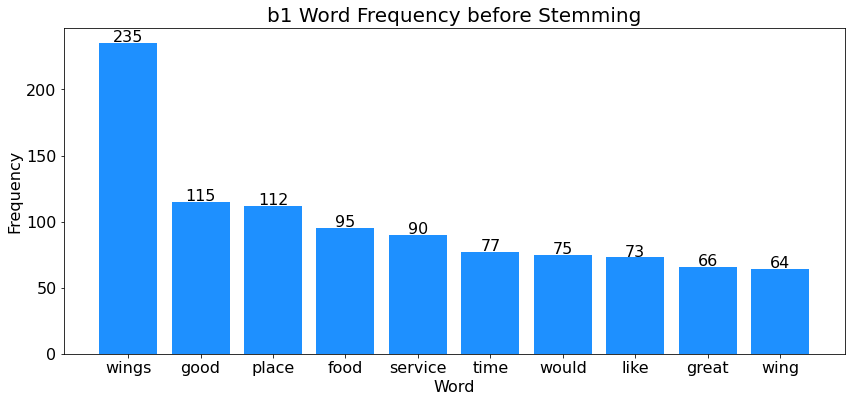

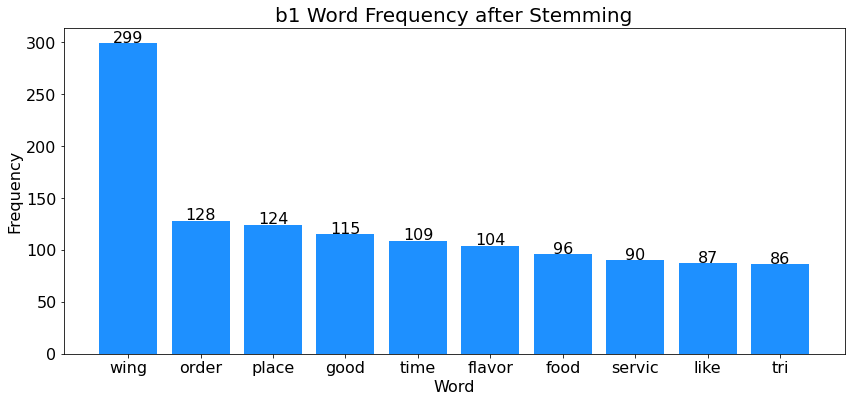

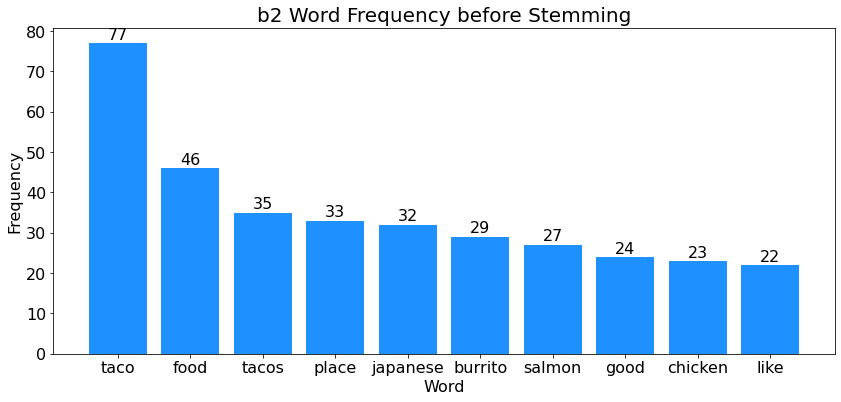

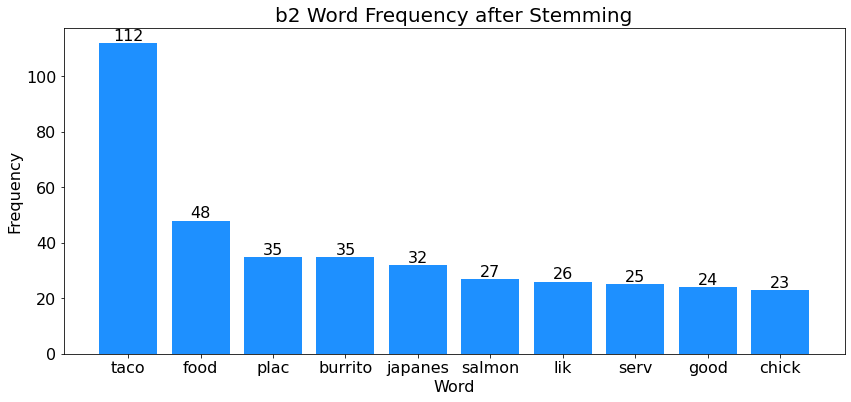

In [63]:
# get word frequency before and after stemming
b1_freq = get_freq(b1_clean_token, 'b1 Word Frequency before Stemming')
b1_stem_freq = get_freq(b1_stem_token, 'b1 Word Frequency after Stemming')

b2_freq = get_freq(b2_clean_token, 'b2 Word Frequency before Stemming')
b2_stem_freq = get_freq(b2_stem_token, 'b2 Word Frequency after Stemming')


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


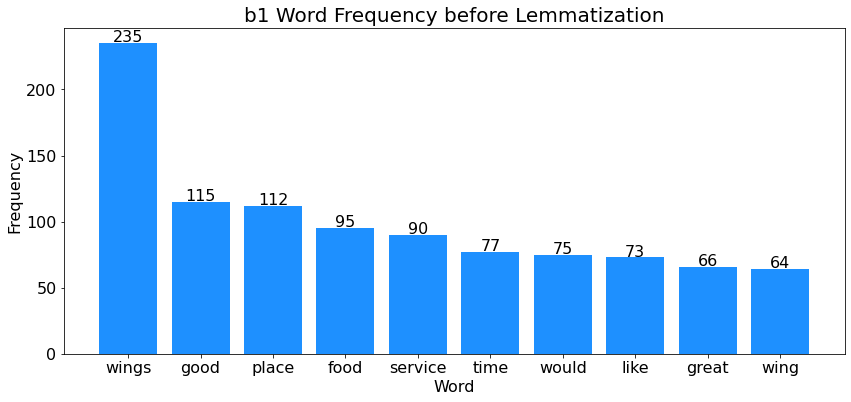

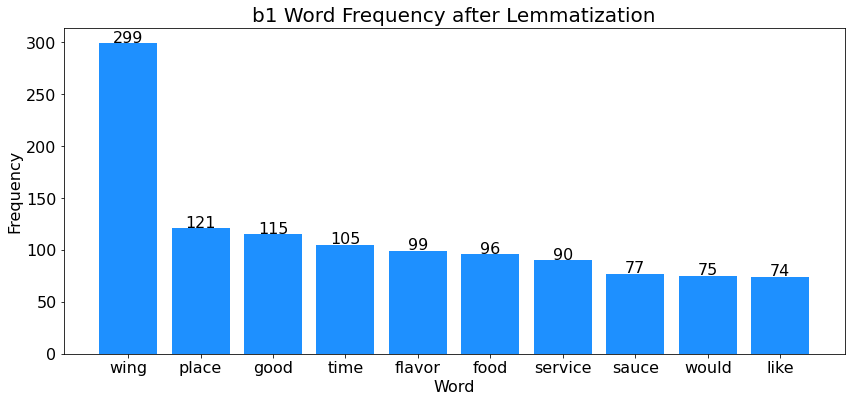

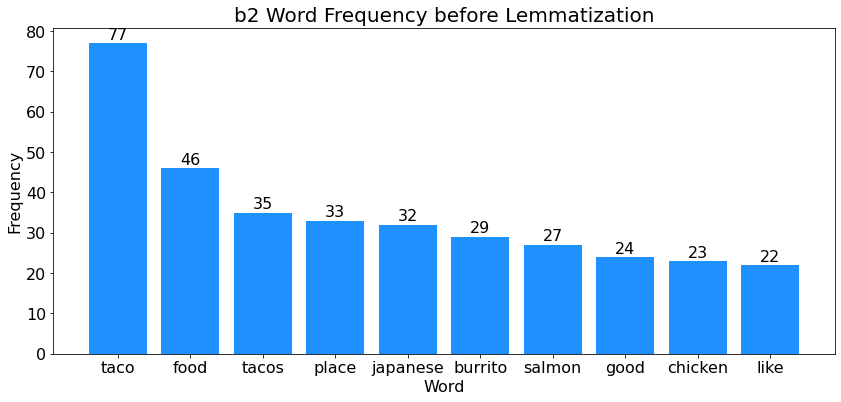

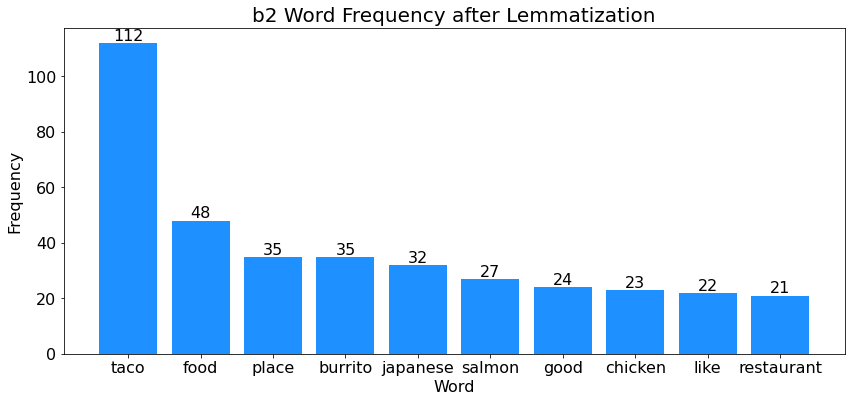

In [71]:
# lemmatization
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer  
lemmatizer = WordNetLemmatizer()  

def get_lemmatizer(tokens):
    token_stem = []
    for token in tokens:
        token_stem.append(lemmatizer.lemmatize(token))
    return token_stem

b1_stem_token = get_lemmatizer(b1_clean_token)
b2_stem_token = get_lemmatizer(b2_clean_token)

b1_freq = get_freq(b1_clean_token, 'b1 Word Frequency before Lemmatization')
b1_stem_freq = get_freq(b1_stem_token, 'b1 Word Frequency after Lemmatization')

b2_freq = get_freq(b2_clean_token, 'b2 Word Frequency before Lemmatization')
b2_stem_freq = get_freq(b2_stem_token, 'b2 Word Frequency after Lemmatization')
